In [ ]:
!pip install tensorflow

In [ ]:
import keras
import pandas as pd
# from keras import layers, Sequential
import argparse
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import os

import tensorflow as tf  # Mengimport library TensorFlow untuk machine learning
from tensorflow.keras import layers  # Mengimport modul layers dari TensorFlow Keras untuk pembuatan model
from tensorflow.keras.models import Sequential  # Mengimport modul Sequential dari TensorFlow Keras untuk pembuatan model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense  # Mengimport lapisan-lapisan yang akan digunakan dalam model

[INFO] Loaded csv Dataset
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               68096     
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 3)                 771       
                                                                 
Total params: 200195 (782.01 KB)
Trainable params: 200195 (782.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model Summary:  None
[INFO] Model Training Started ...
Epoch 1/200
1/8 [==>...........................] - ETA: 5s - loss: 1.1867 - accuracy: 0.3125
Epoch 1: val_accuracy improved from -inf to 0.82759, saving model to badmin2.keras
8/8 [================

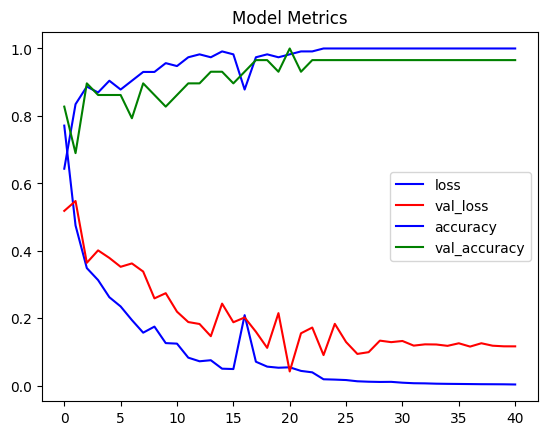

In [ ]:
path_csv = "data3.csv"
path_to_save = "badmin2.keras"

# Load .csv Data
df = pd.read_csv(path_csv)
class_list = df['Pose_Class'].unique()
class_list = sorted(class_list)
class_number = len(class_list)

# Create training and validation splits
x = df.copy()
y = x.pop('Pose_Class')
y, _ = y.factorize()
x = x.astype('float64')
y = keras.utils.to_categorical(y)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=0)

print('[INFO] Loaded csv Dataset')

# model = Sequential([
#     layers.Dense(512, activation='relu', input_shape=[x_train.shape[1]]),
#     layers.Dense(256, activation='relu'),
#     layers.Dense(class_number, activation="softmax")
# ])

model = Sequential([
    Dense(512, activation='relu', input_shape=[x_train.shape[1]]),
    Dense(256, activation='relu'),
    Dense(class_number, activation='softmax')
])

# Model Summary
print('Model Summary: ', model.summary())

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Add a checkpoint callback to store the checkpoint that has the highest
# validation accuracy.
checkpoint_path = path_to_save
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path,
                                             monitor='val_accuracy',
                                             verbose=1,
                                             save_best_only=True,
                                             mode='max')
earlystopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                              patience=20)

print('[INFO] Model Training Started ...')
# Start training
history = model.fit(x_train, y_train,
                    epochs=200,
                    batch_size=16,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint, earlystopping])

# model.save("badmin.h5")

save = tf.saved_model.save(model, 'export')

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("/content/export") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

print('[INFO] Model Training Completed')
print(f'[INFO] Model Successfully Saved in /{path_to_save}')

# Result in graph =========================================== #

# Plot History
metric_loss = history.history['loss']
metric_val_loss = history.history['val_loss']
metric_accuracy = history.history['accuracy']
metric_val_accuracy = history.history['val_accuracy']

# Construct a range object which will be used as x-axis (horizontal plane) of the graph.
epochs = range(len(metric_loss))

# Plot the Graph.
plt.plot(epochs, metric_loss, 'blue', label=metric_loss)
plt.plot(epochs, metric_val_loss, 'red', label=metric_val_loss)
plt.plot(epochs, metric_accuracy, 'blue', label=metric_accuracy)
plt.plot(epochs, metric_val_accuracy, 'green', label=metric_val_accuracy)

# Add title to the plot.
plt.title(str('Model Metrics'))

# Add legend to the plot.
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])

# If the plot already exist, remove
plot_png = os.path.exists('metrics.png')
if plot_png:
    os.remove('metrics.png')
    plt.savefig('metrics.png', bbox_inches='tight')
else:
    plt.savefig('metrics.png', bbox_inches='tight')
print('[INFO] Successfully Saved metrics.png')


In [ ]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
import tensorflow as tf


# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/content/model.tflite")
interpreter.allocate_tensors()

model.summary()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(f"Input Data = {input_details}")
print(f"Output Data = {output_details}")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               68096     
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 3)                 771       
                                                                 
Total params: 200195 (782.01 KB)
Trainable params: 200195 (782.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Input Data = [{'name': 'serving_default_dense_12_input:0', 'index': 0, 'shape': array([  1, 132], dtype=int32), 'shape_signature': array([ -1, 132], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=f

In [ ]:
tflite_interpreter = tf.lite.Interpreter("/content/model.tflite")

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

== Input details ==
name: serving_default_dense_12_input:0
shape: [  1 132]
type: <class 'numpy.float32'>

== Output details ==
name: StatefulPartitionedCall:0
shape: [1 3]
type: <class 'numpy.float32'>


**TEST MODEL**

In [ ]:
# Load MobileNetV2 model
# model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
# model = tf.keras.Sequential([hub.KerasLayer(model_url)])

interpreter = tf.lite.Interpreter(model_path="/content/model.tflite")
interpreter.allocate_tensors()

model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

model.summary()

# Check model summary
model.build([1, 132, 132, 3])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               68096     
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 3)                 771       
                                                                 
Total params: 200195 (782.01 KB)
Trainable params: 200195 (782.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               68096     
                                                          